# Statistical Methods in AI (CSE/ECE 471) - Spring-2020
#  Assignment-2 / **Q2** / Topic: Gaussian Mixture Models Clustering
# Submitted By: VENUGOPAL REDDY MEKA
# Roll No: 2019900065

In [20]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
from scipy.stats import multivariate_normal
from scipy.stats import norm
import pickle

%matplotlib inline

### Load GMM1D class

In [21]:
np.random.seed(0)


def load(name):
    file = open(name, 'rb')
    data = pickle.load(file)
    file.close()
    return data


def save(data, name):
    file = open(name, 'wb')
    pickle.dump(data, file)
    file.close()


class GMM1D:
    def __init__(self,
                 X,
                 iterations,
                 initmean,
                 initprob,
                 initvariance):
        """
        initmean = [a,b,c] initprob=[1/3,1/3,1/3] initvariance=[d,e,f]
        """
        self.iterations = iterations
        self.X = X
        self.mu = initmean
        self.pi = initprob
        self.var = initvariance
        self.bins = np.linspace(self.X.min(), self.X.max(), num=60)
    """
    E step
    """
    def calculate_prob(self, r):
        for c, g, p in zip(range(3), [norm(loc=self.mu[0], scale=self.var[0]),
                                      norm(loc=self.mu[1], scale=self.var[1]),
                                      norm(loc=self.mu[2], scale=self.var[2])], self.pi):
            r[:, c] = p * g.pdf(self.X)
        """
        Normalize the probabilities such that each row of r sums to 1 and weight it by mu_c == the fraction of points belonging to 
        cluster c
        """
        for i in range(len(r)):
            r[i] = r[i] / (np.sum(self.pi) * np.sum(r, axis=1)[i])

        return r

    def plot(self, r):
        fig = plt.figure(figsize=(10, 10))
        axes = plt.gca()
        ax0 = fig.add_subplot(111)

        for i in range(len(r)):
            plt.scatter(self.X, [0.005] * len(X), color='navy', s=30, marker=2, label="Train data")

        plt.plot(self.bins, norm(loc=self.mu[0], scale=self.var[0]).pdf(self.bins), color='r', label="Cluster 1")
        # Plot the gaussians
        for g, c in zip([norm(loc=self.mu[0], scale=self.var[0]).pdf(self.bins),
                         norm(loc=self.mu[1], scale=self.var[1]).pdf(self.bins),
                         norm(loc=self.mu[2], scale=self.var[2]).pdf(self.bins)], ['blue', 'green', 'magenta']):
            plt.plot(self.bins, g, c=c)

    def run(self):
        for iter_ in range(self.iterations):
            # Create the array r with dimensionality nxK
            r = np.zeros((len(self.X), 3))

            # Probability for each datapoint x_i to belong to gaussian g
            r = self.calculate_prob(r)

            # Plot the data
            self.plot(r)

            # M-Step

            # calculate m_c
            m_c = []
            for c in range(len(r[0])):
                m = np.sum(r[:, c])
                m_c.append(m)
            print(f"Iteration: {iter_}, m_c: {m_c}")

            # calculate pi_c
            for k in range(len(m_c)):
                self.pi[k] = (m_c[k] / np.sum(m_c))
            print(f"Iteration: {iter_}, pi_c: {self.pi}")

            # calculate mu_c
            self.mu = np.sum(self.X.reshape(len(self.X), 1) * r, axis=0) / m_c
            print(f"Iteration: {iter_}, mu_c: {self.mu}")
            
            # calculate var_c
            var_c = []
            for c in range(len(r[0])):
                var_c.append((1 / m_c[c]) * np.dot(
                    ((np.array(r[:, c]).reshape(len(self.X), 1)) * (self.X.reshape(len(self.X), 1) - self.mu[c])).T,
                    (self.X.reshape(len(self.X), 1) - self.mu[c]))[0][0])
            print(f"Iteration: {iter_}, var_c: {var_c}")
            
            plt.show()


### Load the data

In [22]:
X0 = load("./Datasets/Question-2/dataset1.pkl")
X1 = load("./Datasets/Question-2/dataset2.pkl")
X2 = load("./Datasets/Question-2/dataset3.pkl")

### Prepare the data

In [23]:
X = np.array(list(X0) + list(X1) + list(X2))
X = X.flatten()
print(f"Min value of X: {np.min(X)}")
print(f"Max value of X: {np.max(X)}")
print(f"Shape of X: {X.shape}")

k = 3
weights = np.ones(k) / k
means = np.random.choice(X, k)
variances = np.random.random_sample(size=k)
print(f"Initial Means: {means}")
print(f"Initial variances: {variances}")

Min value of X: -34.57236684465528
Max value of X: 31.259641608756667
Shape of X: (180,)
Initial Means: [-11.15701652  15.4291987    2.82109686]
Initial variances: [0.84426575 0.85794562 0.84725174]


### Create and Run the model

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Iteration: 0, m_c: [68.82523525332272, 48.742780182343935, 62.43198456433334]
Iteration: 0, pi_c: [0.3823624180740151, 0.2707932232352441, 0.34684435869074076]
Iteration: 0, mu_c: [-15.10703102  18.00434282   1.81086849]
Iteration: 0, var_c: [44.93039916221791, 28.40060892086966, 11.300031060093087]


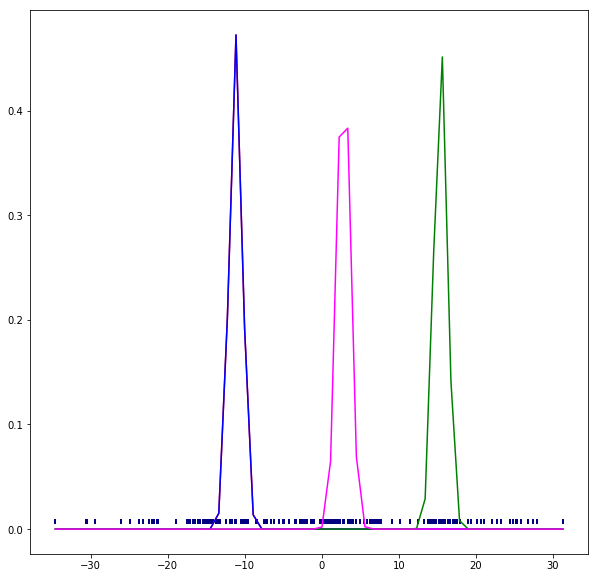

Iteration: 1, m_c: [62.127798214653154, 47.99771309447765, 69.87448869086919]
Iteration: 1, pi_c: [0.3451544345258509, 0.266653961635987, 0.38819160383816215]
Iteration: 1, mu_c: [-16.1486962   18.14177898   1.19373912]
Iteration: 1, var_c: [38.56832670701923, 27.605709902390885, 15.384138706398929]


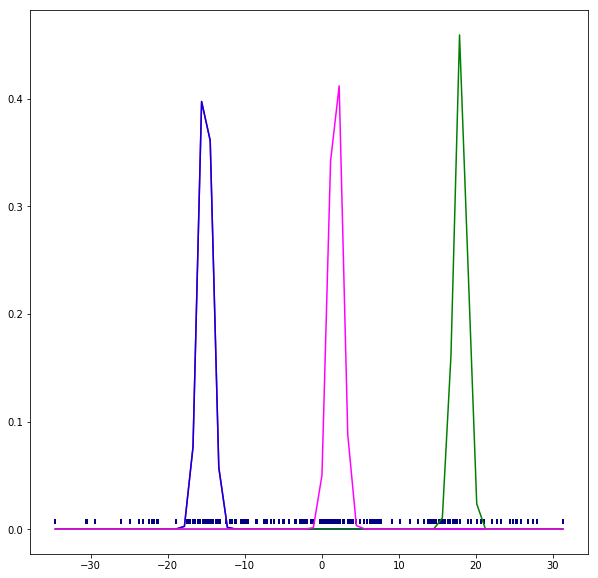

Iteration: 2, m_c: [59.828627603880314, 48.00000607563291, 72.17136632048677]
Iteration: 2, pi_c: [0.33238126446600175, 0.2666667004201828, 0.4009520351138154]
Iteration: 2, mu_c: [-16.494955    18.14139797   0.92801599]
Iteration: 2, var_c: [36.80941217300542, 27.60743015797138, 17.03409768485763]


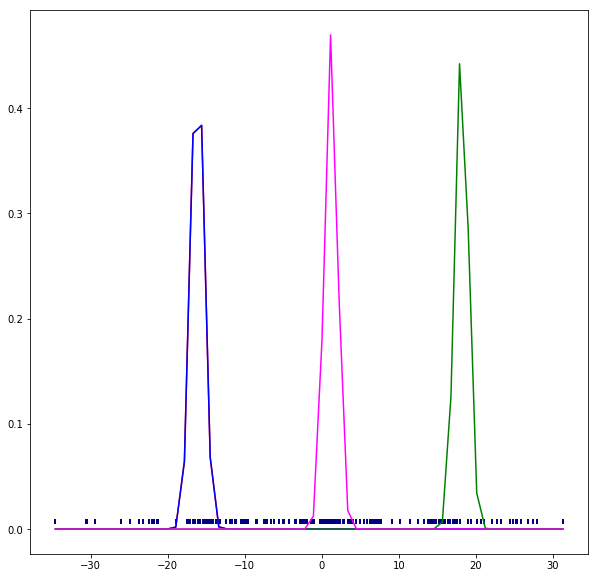

Iteration: 3, m_c: [59.00260973276784, 48.000245680362, 72.99714458687016]
Iteration: 3, pi_c: [0.32779227629315466, 0.2666680315575667, 0.4055396921492787]
Iteration: 3, mu_c: [-16.62001327  18.14135321   0.83191774]
Iteration: 3, var_c: [36.19195377481145, 27.607693829189152, 17.64759064836125]


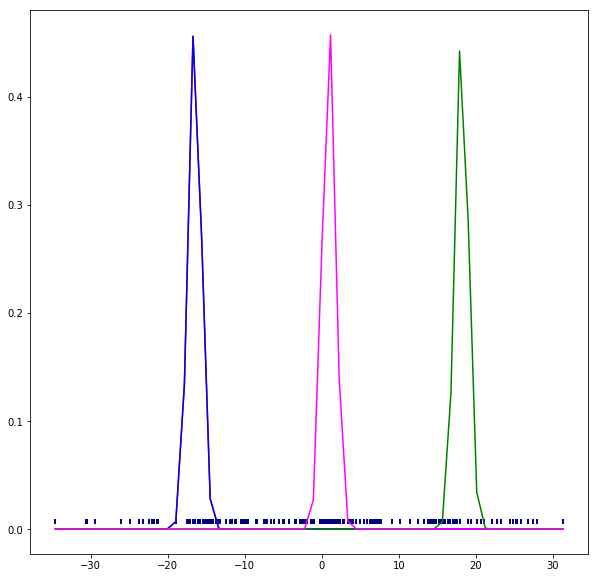

Iteration: 4, m_c: [59.00016220981121, 48.00073536027732, 72.99910242991149]
Iteration: 4, pi_c: [0.3277786789433956, 0.26667075200154067, 0.4055505690550638]
Iteration: 4, mu_c: [-16.62038891  18.14126146   0.83158044]
Iteration: 4, var_c: [36.19005339290033, 27.60823732004713, 17.6490172946111]


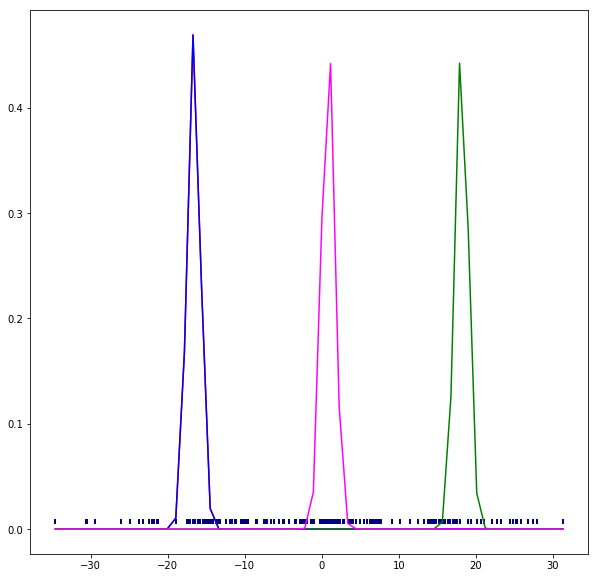

Iteration: 5, m_c: [59.00016065406018, 48.00073905309402, 72.9991002928458]
Iteration: 5, pi_c: [0.32777867030033436, 0.266670772517189, 0.4055505571824766]
Iteration: 5, mu_c: [-16.62038915  18.14126077   0.83157984]
Iteration: 5, var_c: [36.19005220067609, 27.608241418880255, 17.64901582851715]


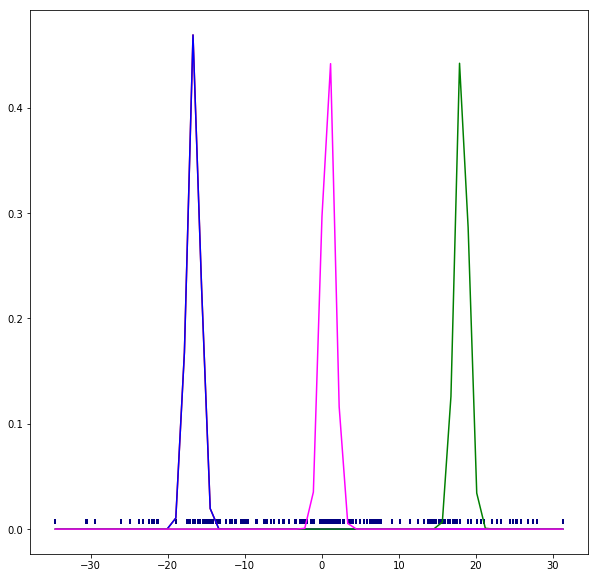

Iteration: 6, m_c: [59.00016065228571, 48.000739064554466, 72.99910028315982]
Iteration: 6, pi_c: [0.32777867029047614, 0.26667077258085814, 0.40555055712866567]
Iteration: 6, mu_c: [-16.62038915  18.14126077   0.83157983]
Iteration: 6, var_c: [36.190052199317314, 27.608241431600764, 17.64901582173146]


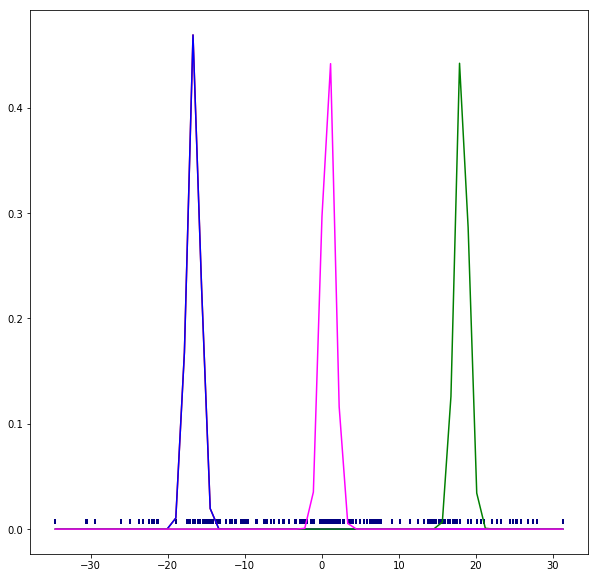

Iteration: 7, m_c: [59.00016065228199, 48.000739064587044, 72.99910028313096]
Iteration: 7, pi_c: [0.3277786702904555, 0.26667077258103916, 0.4055505571285053]
Iteration: 7, mu_c: [-16.62038915  18.14126077   0.83157983]
Iteration: 7, var_c: [36.19005219931448, 27.608241431636927, 17.6490158217112]


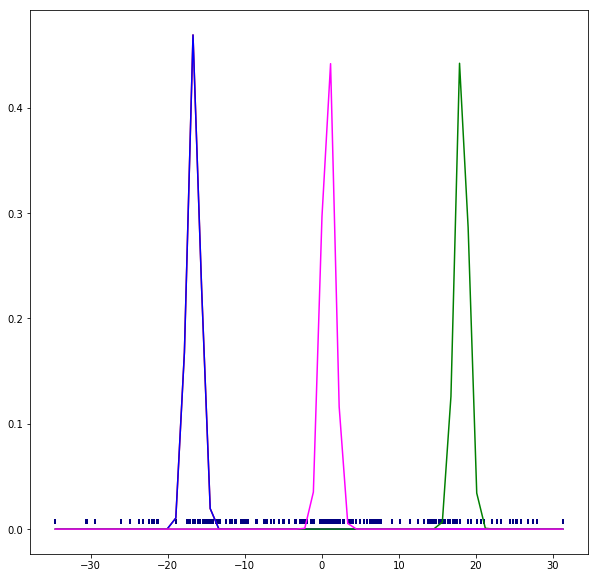

Iteration: 8, m_c: [59.000160652282, 48.00073906458715, 72.9991002831309]
Iteration: 8, pi_c: [0.32777867029045543, 0.26667077258103966, 0.40555055712850485]
Iteration: 8, mu_c: [-16.62038915  18.14126077   0.83157983]
Iteration: 8, var_c: [36.19005219931447, 27.60824143163703, 17.649015821711142]


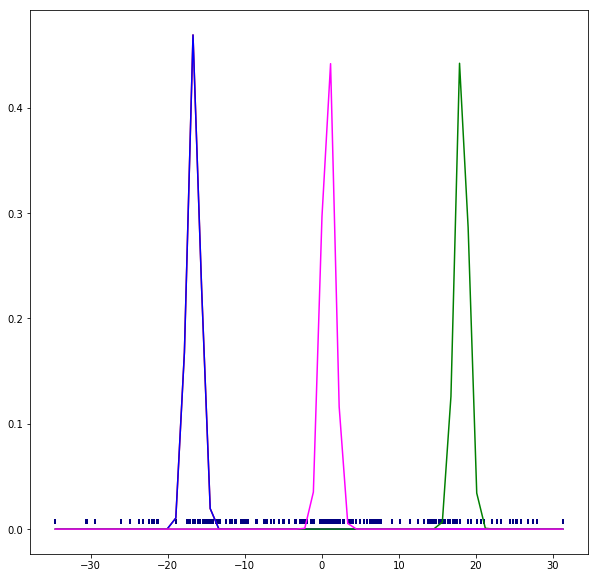

Iteration: 9, m_c: [59.000160652282, 48.00073906458715, 72.9991002831309]
Iteration: 9, pi_c: [0.32777867029045543, 0.26667077258103966, 0.40555055712850485]
Iteration: 9, mu_c: [-16.62038915  18.14126077   0.83157983]
Iteration: 9, var_c: [36.19005219931447, 27.60824143163703, 17.64901582171114]


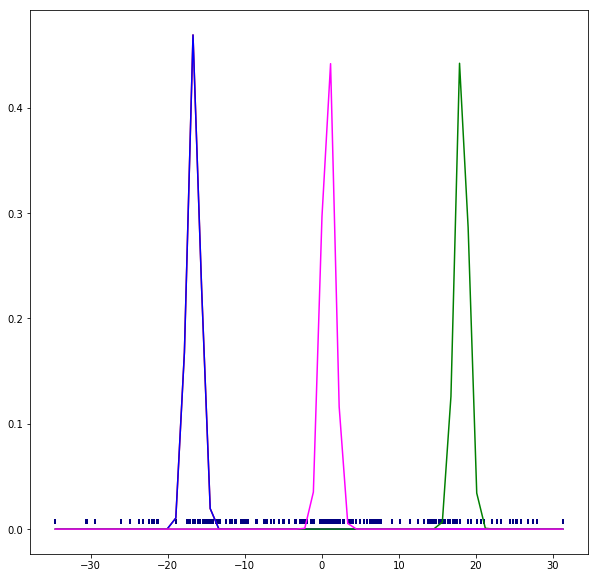

In [24]:
iterations = 10
g = GMM1D(X, iterations, means, [1/3, 1/3, 1/3], variances)
g.run()

## GMM using sklearn

In [25]:
X_Gmm = X.reshape(-1, 1)
gmm = GaussianMixture(3).fit(X_Gmm) 

In [26]:
means = gmm.means_ 
covariances = gmm.covariances_
weights = gmm.weights_

print(f"Means: {means}")
print(f"Covariances: {covariances}")
print(f"Weights: {weights}")
print(f"Converged: {gmm.converged_}")

Means: [[-14.78344158]
 [  1.23154081]
 [ 17.12094862]]
Covariances: [[[53.21780162]]

 [[16.02878441]]

 [[37.5911671 ]]]
Weights: [0.38091988 0.3298266  0.28925352]
Converged: True


In [27]:
labels = gmm.predict(X_Gmm)
print(labels)
df = pd.DataFrame(columns = ['X', 'labels']) 
df['labels']= labels 
df['X'] = X
df.head()

[1 0 2 1 2 2 0 0 2 2 2 0 0 0 2 0 1 2 1 2 0 1 1 1 2 1 1 0 2 2 0 1 1 1 0 0 0
 1 0 0 2 0 1 2 0 2 0 2 1 1 2 1 0 1 0 2 1 2 1 2 1 0 1 0 1 0 1 0 0 2 1 1 0 0
 1 0 0 1 1 0 1 1 0 0 0 1 0 0 2 1 0 0 1 1 1 1 0 2 1 1 1 1 0 0 0 0 0 0 0 1 0
 0 1 0 1 0 1 1 2 0 2 1 2 2 1 0 2 1 2 1 1 0 2 2 2 2 1 1 1 2 1 1 0 2 1 1 2 0
 0 2 1 0 0 0 2 0 1 0 2 2 2 2 1 1 2 2 0 1 2 2 0 1 0 2 0 0 1 2 2 0]


,X,labels
0,-0.212281,1
1,-15.444711,0
2,15.840826,2
3,2.084464,1
4,15.234964,2


In [28]:
d0= df[df['labels']== 0]
d1 = df[df['labels']== 1] 
d2 = df[df['labels']== 2] 

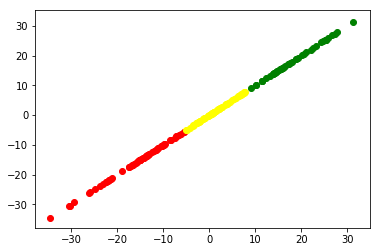

In [29]:
# plot three clusters in same plot 
plt.scatter(d0['X'], d0['X'], c ='r') 
plt.scatter(d1['X'], d1['X'], c ='yellow') 
plt.scatter(d2['X'], d2['X'], c ='g') 

### Number of iterations to converge

In [30]:
print(gmm.n_iter_)

7


### Converged log-likelihood value   

In [31]:
print(gmm.lower_bound_)

-4.03299836260752
